# Augmenting Training Datasets:

## Introduction:
This notebook contains the augmentation process of training images. Augmentations can help introduce diversity into our images as well as artificially enlarging the size of the dataset. This helps the model learn fundamental features of images as well as ignoring background noise. For this project, I used the `imgaug` and `opencv` package to modify the training dataset. However, the same augmentations can be achieved using other image operation packages such as `pillow` and `skimage`.

All the functions that are covered in this notebook are stored in the `augmentations.py` module. The operations showcased here may be slightly modified for demonstration purposes.

# Import Packages:
The packages below are used to compile the notebook.

In [1]:
## Import necessary packages.
import imgaug.augmenters as iaa
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import sys

# Initialize Working Directory:
Make sure that the notebook's workspace is located in the root folder of this project so that it can have access to all the modules and datasets.

In [2]:
## Initialize the base directory to be in root folder.
base_dir = os.path.abspath(os.path.join('.', '..'))

# Get Example Image:
To demonstrate the augmentations that were used in this project, we'll first load in a single image containing a character (located in `./datasets/images/`). For this example, we'll use an image containing the character "A". However, please feel free to use your own personal images. 

In [3]:
## Define the image path.
img_path = os.path.join(base_dir, 'datasets', 'images', 'test_img_A.jpg')

## Load in image using PIL Image.
## You can also change the file path to another image.
img = Image.open(img_path)

## Convert image to an image array.
img = np.array(img)

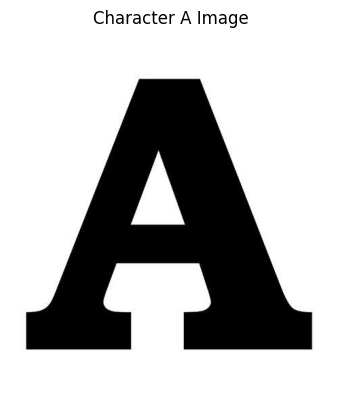

In [4]:
## Show image using matplotlib to make sure it was loaded in correctly.
plt.imshow(img)
plt.title("Character A Image")
plt.axis('off')
plt.show()

# Apply Augmentations:
The `imgaug` and `opencv` packages offer numerous augmentations. These are the following operations that I chose for this project:

### Morphology:
Morphology operations were used to change the shape of individual characters. This can be helpful as it creates realistic deformations as well as diverse features in images. The following morphology operations were implemented:
 - **Erosion:** Used for thinning the edges of the letters. This was used to mimic letter deterioration as well as different angle of lighting (based on lighting, image can have thinner edges).
 - **Dilation:** Was used for thickening the edges of the letters. Can be used to replicate characters taken at a closer range and help the model understand rotund letters.

### Noise:
Artificial noises can be very useful for training as it can help the model focus more on the fundamental features of the letters and be less susceptible to the background environment. Also, adding noise can help imitate poor image quality as well as rough textures. The following operations were used:
 - **Gaussian Noise:** Adds static pixels to the image. Prepares the model for images that were taken in poor quality cameras or environment conditions (fog, mist, etc).
 - **Salt and Pepper Noise:** Adds random white and black pixels to the image. Replicates image degradation.
 - **Dropout:** Randomly removes pixels from image. Can help model learn features that are potentially obscured.

### Transformation:
Transformations are primarily used for enlarging the training dataset without the needs for additional labeled images as well as introducing the model to various real world scenarios. The following augmentations were used:
 - **Rotation:** Used to rotate the word between -10% and 10%. Helps model to understand letters taken at different angles. 
 - **Scale:** Used to zoom in and out of images. Applies to photos taken at different camera distances.
 - **Translation:** Used to change the displacement of letters. Allows model to learn letters at different positioning.
 - **Shearing:** Adds distortion to images. Helps the model learn different perspective angles. 

### Blurring:
Blurring can help the model to learn images out-of-focus, of low quality, or taken in motion. The following operations were used:
 - **Guassian Blur:** Applied blur using Gaussian distribution. Helps the model to learn images with poor quality.

Below visualizes all these augmentations applied onto our test image using the `imgaug` and `opencv` packages.

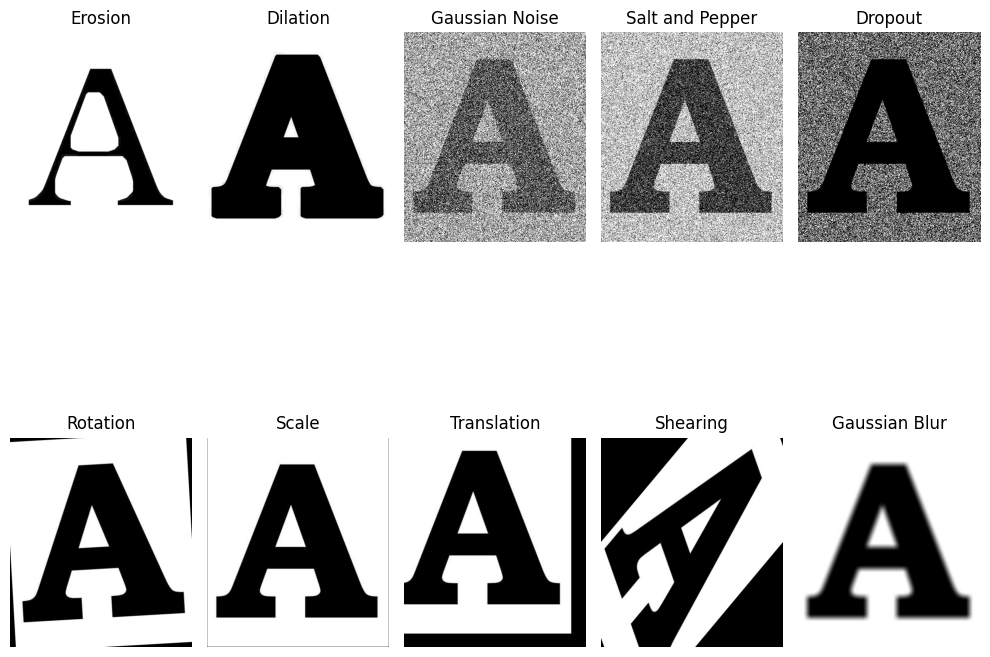

In [5]:
## Create a list of all the augmentations used for this project.
aug_list = ['Erosion', 'Dilation', 'Gaussian Noise', 'Salt and Pepper', 'Dropout', 
            'Rotation', 'Scale', 'Translation', 'Shearing', 'Gaussian Blur']

img_erode = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)), iterations = 5)
img_dilate = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)), iterations = 3)
img_gauss_noise = iaa.AdditiveGaussianNoise(scale = (255, 1.5 * 255))(image = img)
img_salt_pepper = iaa.SaltAndPepper(0.5)(image = img)
img_dropout = iaa.Dropout(p = (0.3, 0.7))(image = img)
img_rotate = iaa.Affine(rotate = (-10, 10))(image = img)
img_scale = iaa.Affine(scale = (0.5, 1.0))(image = img)
img_translate = iaa.Affine(translate_percent = {"x": (-0.1, 0.1), "y": (-0.1, 0.1)})(image = img)
img_shear = iaa.Affine(shear = (40, 40))(image = img)
img_gauss_blur = iaa.GaussianBlur(sigma = (7.0, 8.5))(image = img)

aug_img_list = [img_erode, img_dilate, img_gauss_noise, img_salt_pepper, img_dropout, 
                img_rotate, img_scale, img_translate, img_shear, img_gauss_blur]

num_rows = 2
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, 10))

for j in range(num_rows):
    for i in range(num_cols):
        axs[j, i].imshow(aug_img_list[(j * num_cols) + i])
        axs[j, i].set_title(f"{aug_list[(j * num_cols) + i]}")
        axs[j, i].axis('off')

plt.tight_layout()
plt.show()

# Applying Augmentations on Training Dataset:
We can now apply our augmentations to our training images. Before we apply the augmentations, we want to make sure that they're applied randomly with different parameters. That way, we'll have a more diverse dataset as random augmentations can combine with each other making more exotic images. To apply augmentations randomly, we'll create a sequence of augmentation operations with different activation probabilities. This is done using the `augment_dictionary` function in the `augmentations.py` module. Please check the `augmentations.py` module for more information.

Below shows the implementation of this function using the `train_aug_0.mat` file in the `datasets` folder.

In [6]:
## Import the augmentations module in CustomOCR.
sys.path.append(base_dir)
import CustomOCR.augmentations as aug
import CustomOCR.utils.file_operations as fo

## Load in the training mat file.
train_path = os.path.join(base_dir, 'datasets', 'case_sensitive', 'train_aug_0.mat')
train_dict = fo.load_mat_data(train_path)

## Augment the training dataset using augment_dictionary over one iteration.
aug_dict = aug.augment_dictionary(train_dict, aug_iter = 1)

Finished Augmenting 1 / 62
Finished Augmenting 2 / 62
Finished Augmenting 3 / 62
Finished Augmenting 4 / 62
Finished Augmenting 5 / 62
Finished Augmenting 6 / 62
Finished Augmenting 7 / 62
Finished Augmenting 8 / 62
Finished Augmenting 9 / 62
Finished Augmenting 10 / 62
Finished Augmenting 11 / 62
Finished Augmenting 12 / 62
Finished Augmenting 13 / 62
Finished Augmenting 14 / 62
Finished Augmenting 15 / 62
Finished Augmenting 16 / 62
Finished Augmenting 17 / 62
Finished Augmenting 18 / 62
Finished Augmenting 19 / 62
Finished Augmenting 20 / 62
Finished Augmenting 21 / 62
Finished Augmenting 22 / 62
Finished Augmenting 23 / 62
Finished Augmenting 24 / 62
Finished Augmenting 25 / 62
Finished Augmenting 26 / 62
Finished Augmenting 27 / 62
Finished Augmenting 28 / 62
Finished Augmenting 29 / 62
Finished Augmenting 30 / 62
Finished Augmenting 31 / 62
Finished Augmenting 32 / 62
Finished Augmenting 33 / 62
Finished Augmenting 34 / 62
Finished Augmenting 35 / 62
Finished Augmenting 36 / 62
F

Below shows some of the augmentations implemented on the training images.

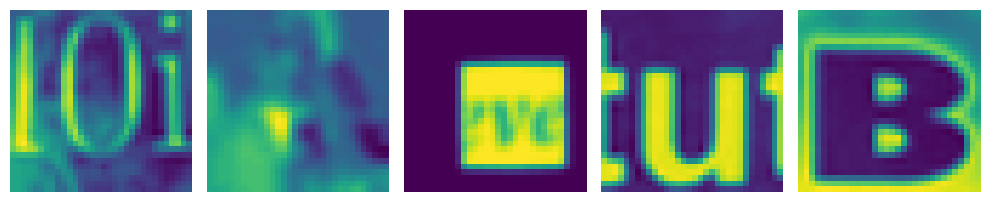

In [7]:
## Number of example images.
num_cols = 5

fig, axs = plt.subplots(1, num_cols, figsize = (10, 10))

## Pick random images from training dataset and plot them.
for i in range(num_cols):
    rand_index = np.random.randint(0, 62)
    tot_len = len(aug_dict['images'][0][rand_index])
    axs[i].imshow(aug_dict['images'][0][rand_index][np.random.randint(0, tot_len)])
    axs[i].axis('off')

plt.tight_layout()
plt.show()